In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# 1. Read in the FEM results
Read in the FEM results csv files. Join them together and save the new data file as '.csv' and '.hdf5' file.

In [14]:
f_dist = './python1/dis_23_forward_inputAct_abbc.csv'
f_strs = 'python1/stress_cable_forward_inputAct_abbc.csv'
in_case = f_dist.split('_')[-1].split('.')[0]
print(f'The input case is {in_case}.')

df_for = pd.read_csv(f_dist)
df_stress = pd.read_csv(f_strs)

df_db = pd.concat([df_for,df_stress],axis=1)

df_db.to_hdf(f'act4_{in_case}.hdf5',key='noT')
df_db.to_csv(f'act4_{in_case}.csv',index=False)

tmp = pd.read_hdf(f'act4_{in_case}.hdf5')
assert(tmp.shape[0]==df_for.shape[0])
del(tmp)

The input case is abbc.


c:\Users\DL\Desktop\DIM\env\lib\site-packages\pandas\core\generic.py:2606: PerformanceWarning:


your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['23x', '23y', '23z', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32'],
      dtype='object')]




AssertionError: 

<AxesSubplot:>

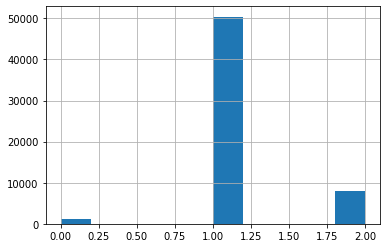

In [17]:
df_for.ijk.hist()

<AxesSubplot:>

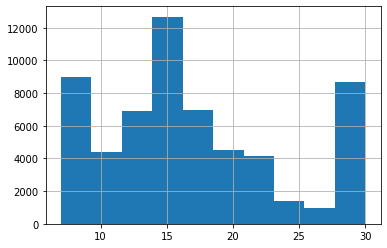

In [16]:
df_for.n_step.hist()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50412 entries, 0 to 59573
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_step    50412 non-null  float64
 1   ijk       50412 non-null  float64
 2   num_load  50412 non-null  float64
 3   A1        50412 non-null  float64
 4   A2        50412 non-null  float64
 5   A3        50412 non-null  float64
 6   A4        50412 non-null  float64
 7   Tup       50412 non-null  float64
 8   Tmid      50412 non-null  float64
 9   Tdown     50412 non-null  float64
 10  23x       50412 non-null  float64
 11  23y       50412 non-null  float64
 12  23z       50412 non-null  float64
dtypes: float64(13)
memory usage: 5.4 MB
There are 50412 converged solutions out of 59574 attemps .


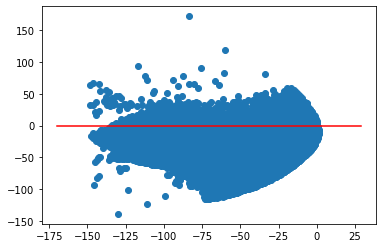

In [18]:
df_good=df_for[df_for['ijk']==1]
df_good = df_good.astype('float')
df_good.info()

print(f'There are {df_good.shape[0]} converged solutions out of {df_for.shape[0]} attemps .' )

df_good['obj']=df_good['23z']/df_good['23y']

plt.scatter(df_good['23x'],df_good['23y'])
plt.plot(range(-170,30),np.zeros(200),'r-')

In [21]:
sample_size = min(1000,df_good.shape[0])
px.scatter_3d(df_good.sample(sample_size),x='23x',y='23y',z='23z',color='n_step')

In [13]:
sample_size = min(1000,df_good.shape[0])
px.scatter_3d(df_good.sample(sample_size),x='A1',y='A4',z='23z',color='23y')

In [23]:
sample_size = min(1000,df_good.shape[0])
px.scatter_3d(df_good[df_good['23z']>0].sample(sample_size),x='23x',y='23y',z='23z',color='A1')

In [ ]:
#%%
# cond=df_good['23y']>40
# %%
# df_select = df_good[cond][['A1','A2','A3','A4']]
# np.savetxt("inputACT_select.csv",df_select.values,delimiter=',')

#%%